In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

TASK1:  Exploratory Data Analysis (EDA) and Business Insights

In [4]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

Customers Dataset Info

In [7]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


Products Dataset Info

In [8]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


Transactions Dataset Info

In [9]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


Missing Values

In [10]:
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


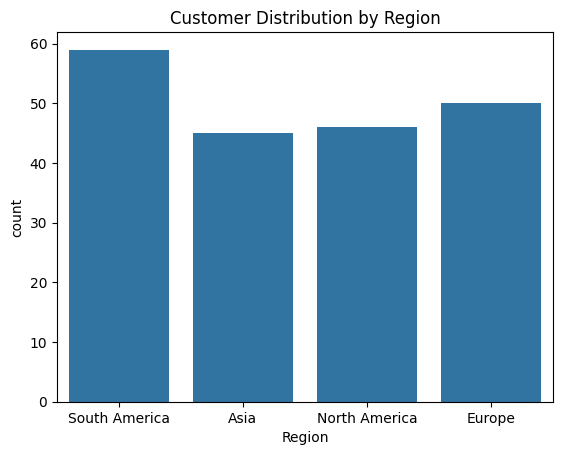

In [12]:
sns.countplot(x='Region', data=customers)
plt.title('Customer Distribution by Region')
plt.show()

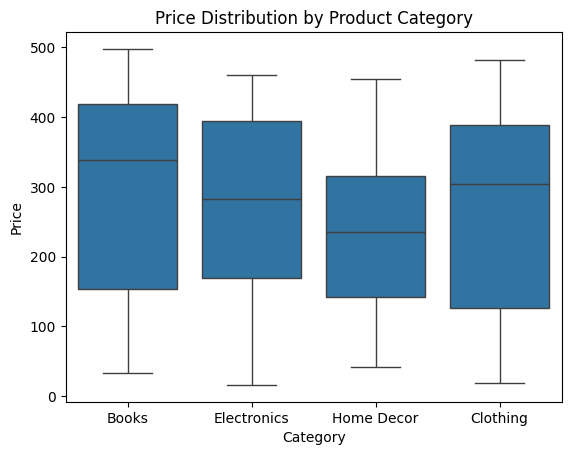

In [13]:
sns.boxplot(x='Category', y='Price', data=products)
plt.title('Price Distribution by Product Category')
plt.show()

In [14]:
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [16]:
merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [17]:
region_sales = merged.groupby('Region')['TotalValue'].sum().reset_index()

In [18]:
region_sales.head()

,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


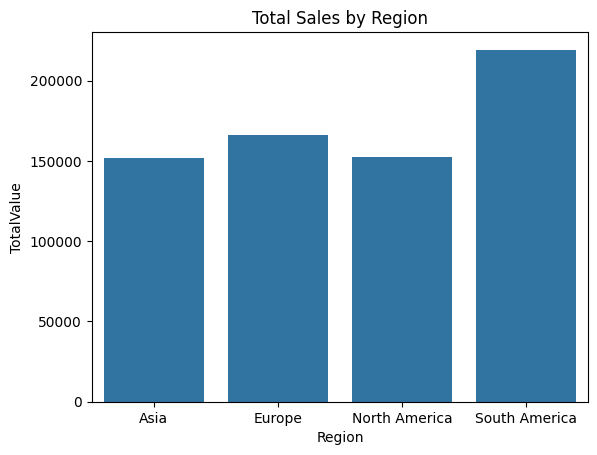

In [19]:
sns.barplot(x='Region', y='TotalValue', data=region_sales)
plt.title('Total Sales by Region')
plt.show()

TASK2: : Lookalike Model

In [20]:
customer_product_matrix = merged.pivot_table(index='CustomerID', columns='ProductID', values='TotalValue', fill_value=0)

In [24]:
similarity_matrix = cosine_similarity(customer_product_matrix)

In [26]:
lookalike_results = {}
for idx, customer_id in enumerate(customer_product_matrix.index[:20]):
    similar_indices = np.argsort(-similarity_matrix[idx])[1:4]
    similar_customers = customer_product_matrix.index[similar_indices]
    scores = similarity_matrix[idx][similar_indices]
    lookalike_results[customer_id] = list(zip(similar_customers, scores))

In [27]:
lookalike_df = pd.DataFrame({
    'CustomerID': lookalike_results.keys(),
    'Recommendations': [v for v in lookalike_results.values()]
})
lookalike_df.to_csv('Sahil_Mukkawar_Lookalike.csv', index=False)

In [28]:
sahil=pd.read_csv('Sahil_Mukkawar_Lookalike.csv')

In [29]:
sahil.head()

,CustomerID,Recommendations
0,C0001,"[('C0050', 0.5326650751975152), ('C0100', 0.52..."
1,C0002,"[('C0109', 0.5734695282308275), ('C0079', 0.52..."
2,C0003,"[('C0181', 0.6200214220870754), ('C0186', 0.55..."
3,C0004,"[('C0063', 0.45920773392365705), ('C0070', 0.4..."
4,C0005,"[('C0096', 0.6683801091411397), ('C0192', 0.64..."


Task3: Customer Segmentation / Clustering

In [32]:
customer_features.head()

,CustomerID,TotalValue,Quantity,Price_y
0,C0001,3354.52,12,278.334000
1,C0002,1862.74,10,208.920000
2,C0003,2725.38,14,195.707500
3,C0004,5354.88,23,240.636250
4,C0005,2034.24,7,291.603333


In [33]:
customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_y': 'mean'  
}).reset_index()

In [34]:
scaler = StandardScaler()

In [36]:
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'Price_y']])

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [40]:
db_index = davies_bouldin_score(scaled_features, kmeans_labels)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 1.12180191226693


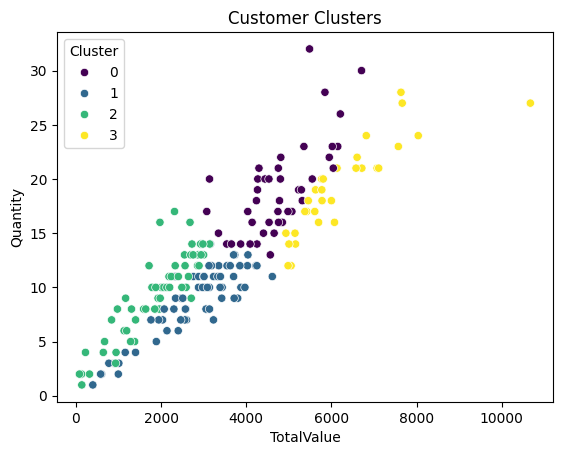

In [42]:
customer_features['Cluster'] = kmeans_labels
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_features, palette='viridis')
plt.title('Customer Clusters')
plt.show()

In [43]:
customer_features.to_csv('Sahil_Mukkawar_Clustering.csv', index=False)

Project Summary: eCommerce Transactions Dataset Analysis
The project involves analyzing eCommerce transaction data to derive insights, build a recommendation model, and perform customer segmentation. The tasks are divided into three parts: EDA, Lookalike Model, and Clustering.